<a href="https://colab.research.google.com/github/fx-manmeet/learn-ml-repo/blob/main/OCR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import keras_ocr

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

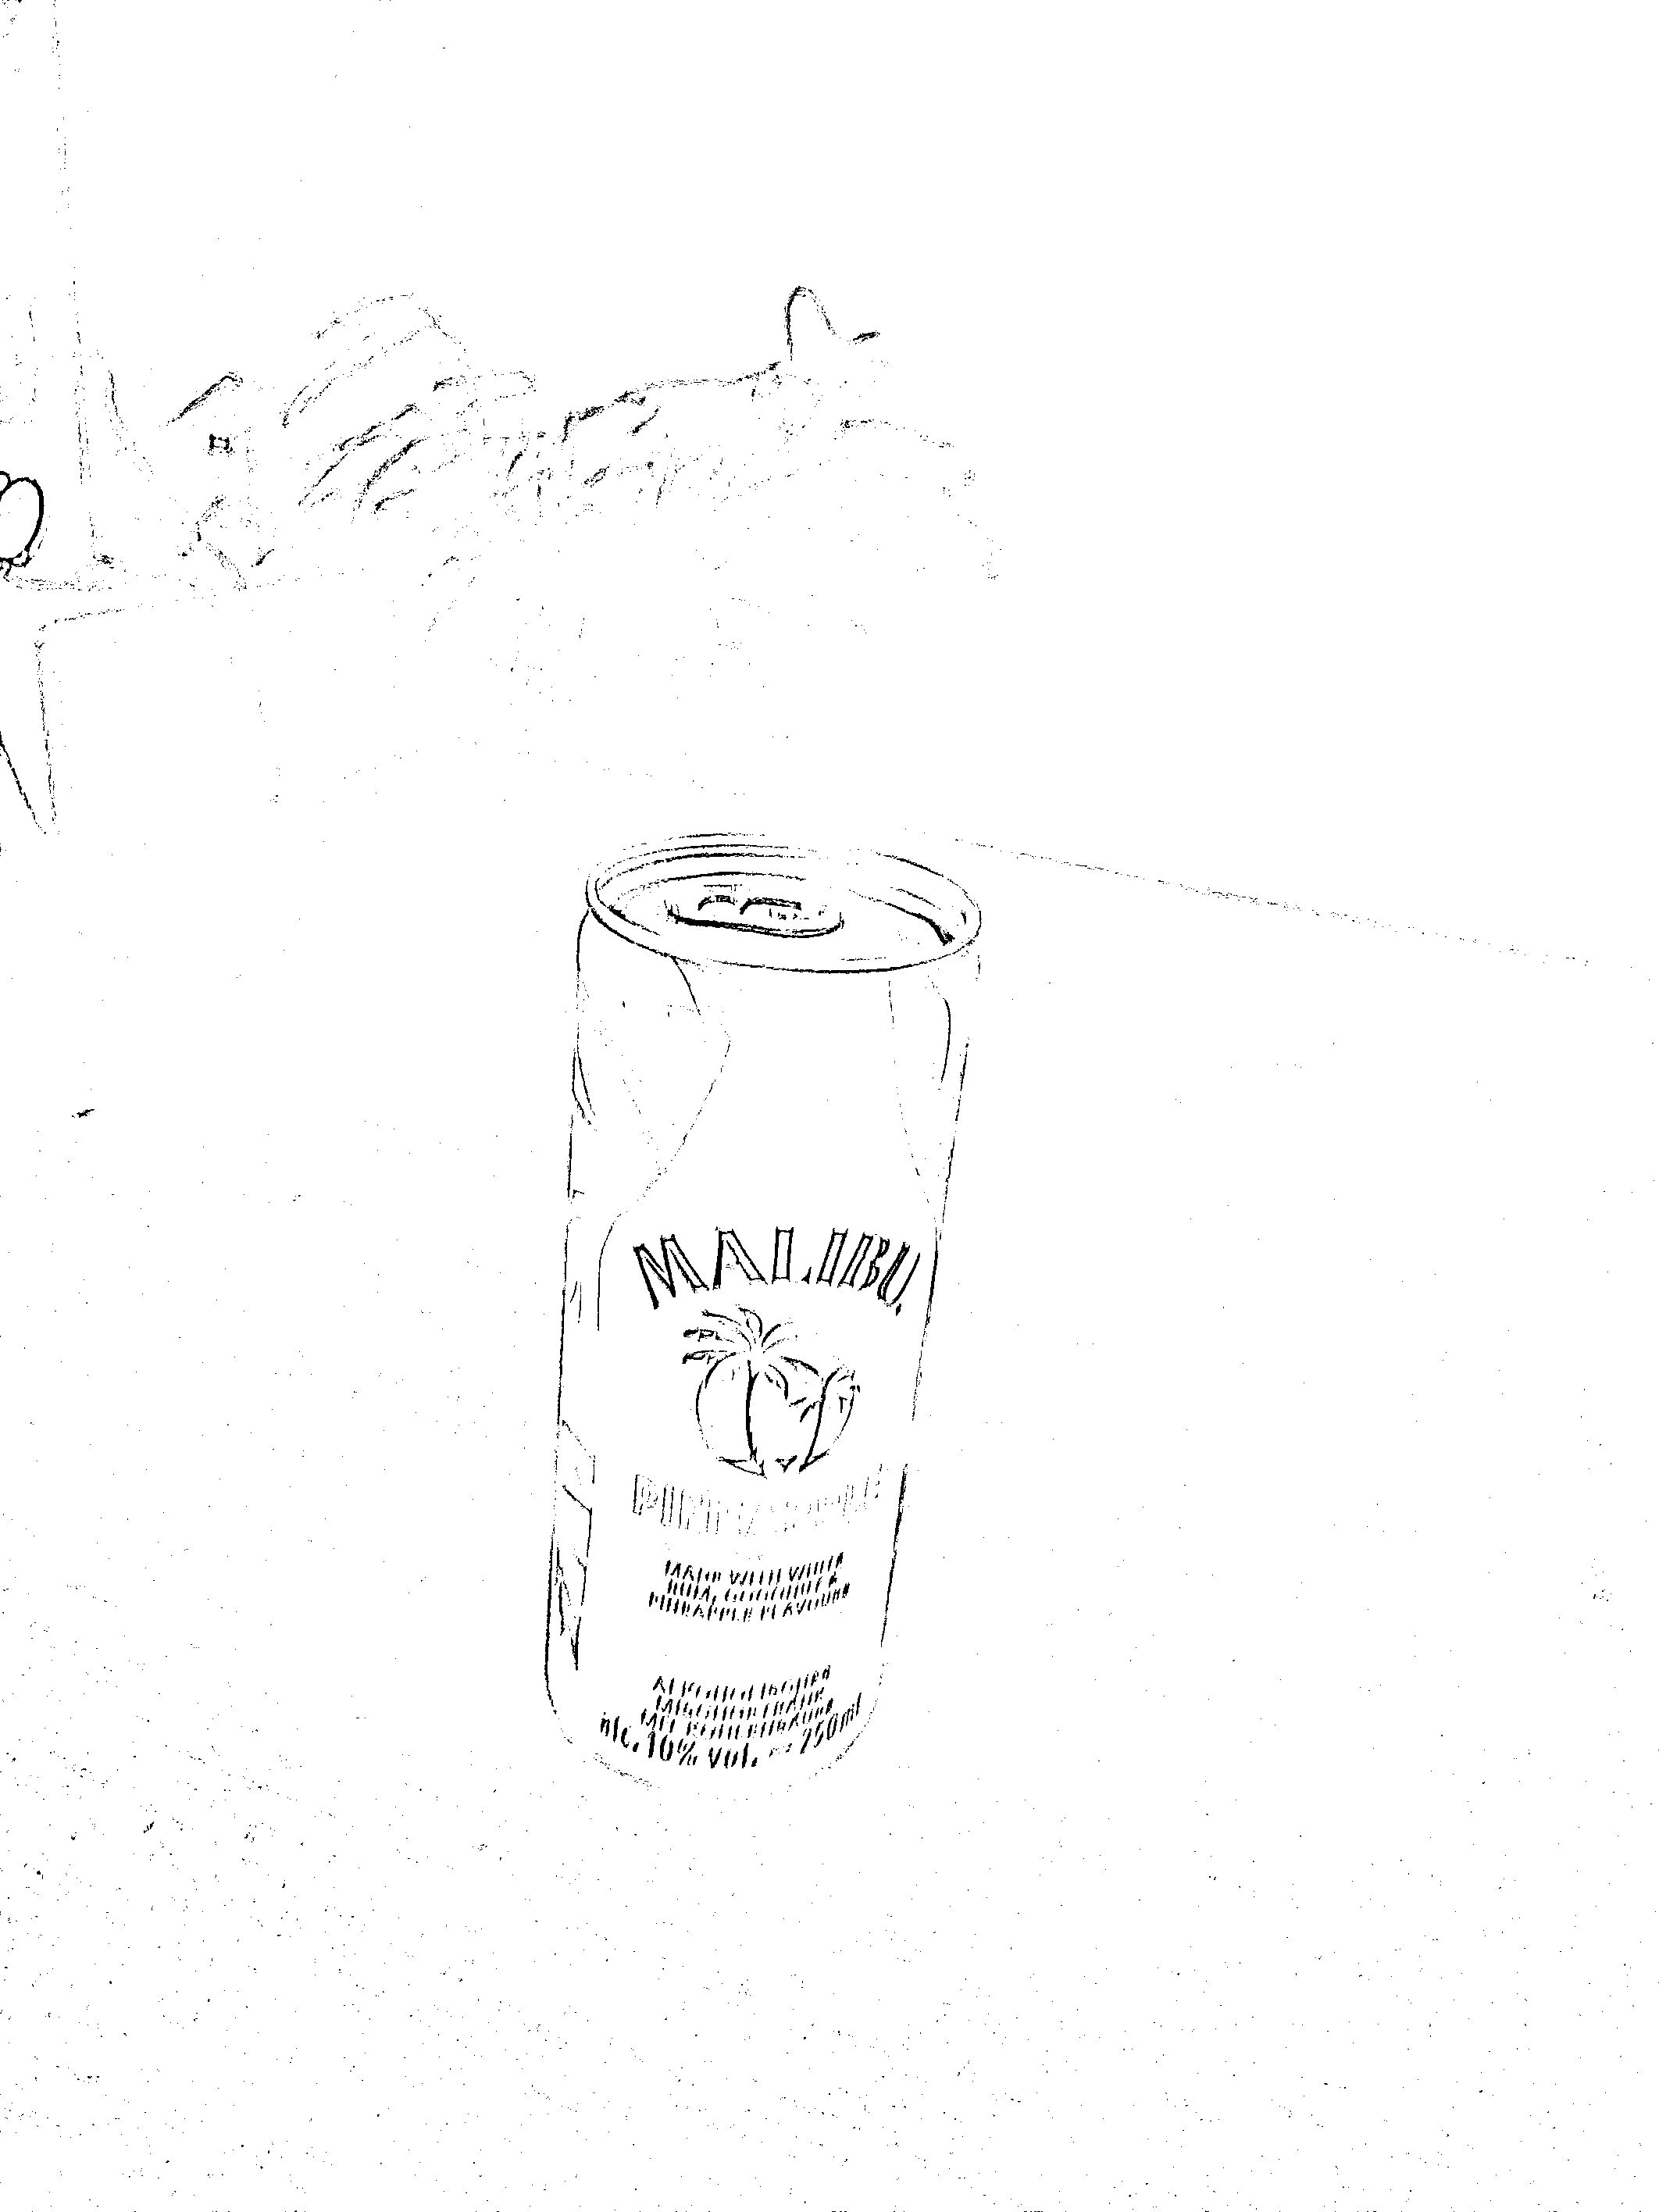

In [ ]:
from skimage.filters import threshold_local

image = cv2.imread('/content/drive/MyDrive/OCR_Cardbord_images/1708520920522651.jpg')

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
cv2_imshow(thresh)

In [ ]:
cv2.imwrite("tresh.jpg",thresh)

True

In [ ]:
img_path='/content/drive/MyDrive/OCR_Cardbord_images/1708521113292892.jpg'
images = [img_path]  # List of image file paths
predictions = pipeline.recognize(images)

1/1 [==============================] - 5s 5s/step


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [ ]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.7 MB/s eta 0:00:00


In [ ]:
probable_words=['malibu','pineapple','made','with','white','rum','coconut','&','flavours','alkoholisches',
                'mischgetrank','mit','kohlensaure','alc','10%','vol','250ml']

In [ ]:
import Levenshtein

# Assuming `probable_words` is your list of probable words
for img_prediction in predictions:
    for i, pred in enumerate(img_prediction):
        word, _ = pred
        min_distance = float('inf')
        nearest_word = word  # Initialize nearest word with the original word

        # Find the nearest word in the list of probable words
        for probable_word in probable_words:
            distance = Levenshtein.distance(word, probable_word)
            if distance < min_distance:
                min_distance = distance
                nearest_word = probable_word


        print(min_distance,word,nearest_word)
        img_prediction[i] = (nearest_word, _)  # Update the word in the original prediction



0 malibu malibu
0 pineapple pineapple
0 white white
0 made made
0 with with
1 s &
0 coconut coconut
0 flavours flavours
2 runa rum
0 pineapple pineapple
0 alkoholisches alkoholisches
1 mischgetrans mischgetrank
2 5oml vol
1 kohlensaue kohlensaure
3 vatt made
2 acs alc
1 10 10%
2 0o &
0 vol vol


In [ ]:
predictions

[[('malibu',
   array([[1081.2168, 1263.1277],
          [1709.6465, 1289.5878],
          [1700.9357, 1496.4683],
          [1072.5061, 1470.0082]], dtype=float32)),
  ('pineapple',
   array([[1080.5225, 1909.0872],
          [1633.9219, 1878.6804],
          [1641.7216, 2020.6357],
          [1088.322 , 2051.0425]], dtype=float32)),
  ('white',
   array([[1427.6138, 2106.7363],
          [1552.653 , 2068.846 ],
          [1563.9805, 2106.227 ],
          [1438.9413, 2144.1177]], dtype=float32)),
  ('made',
   array([[1163.1268, 2091.5522],
          [1295.5193, 2111.6118],
          [1289.8092, 2149.2979],
          [1157.4167, 2129.2383]], dtype=float32)),
  ('with',
   array([[1305.375 , 2110.1719],
          [1421.5312, 2110.1719],
          [1421.5312, 2146.125 ],
          [1305.375 , 2146.125 ]], dtype=float32)),
  ('&',
   array([[1512.7969, 2121.2344],
          [1540.4531, 2121.2344],
          [1540.4531, 2148.8906],
          [1512.7969, 2148.8906]], dtype=float32)),
  ('c

In [ ]:
#import matplotlib.pyplot as plt


# Load the image
image = mpimg.imread(img_path)

# Display the image
# plt.imshow(image)
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()

# Get the height and width of the image
height_img, width_img,_ = image.shape
print(f"Height: {height_img}, Width: {width_img}")


Height: 2832, Width: 2124


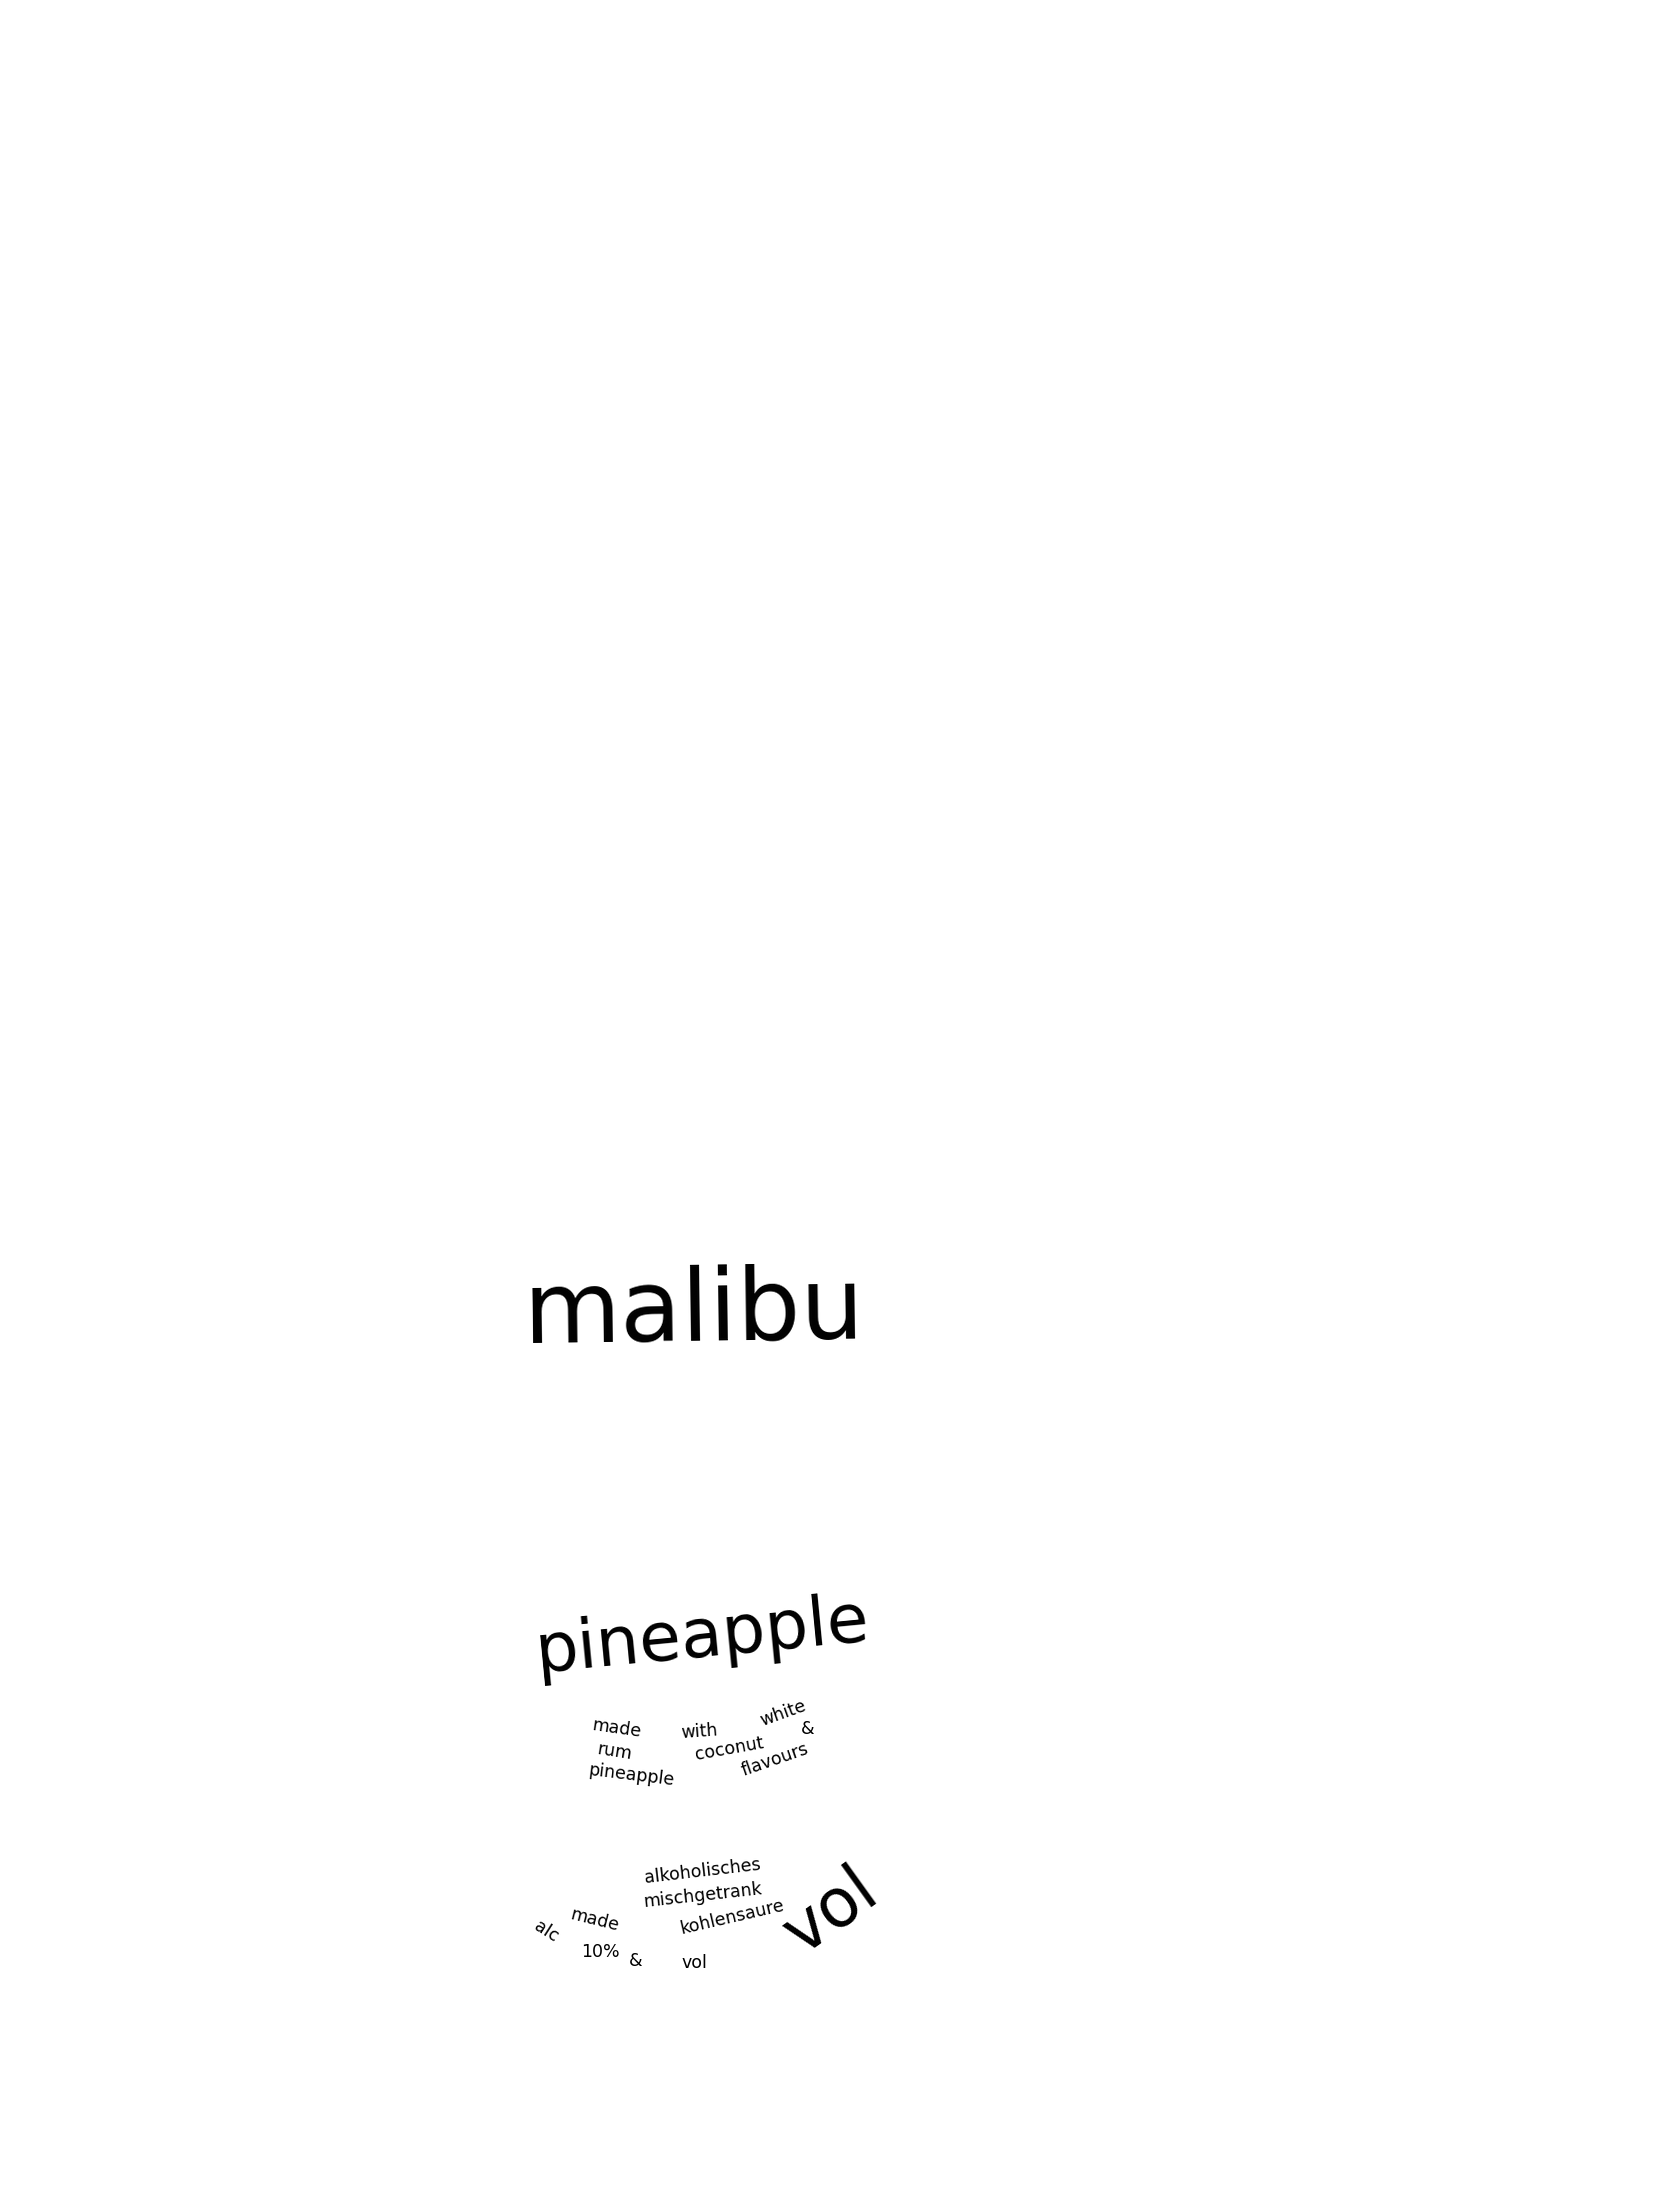

In [ ]:
def calculate_font_size(coords, text):
    """Calculate an appropriate font size for the text to fit within the polygon."""
    # Calculate the bounding box of the polygon
    min_x, min_y = np.min(coords, axis=0)
    max_x, max_y = np.max(coords, axis=0)

    # Calculate the width and height of the bounding box
    width = max_x - min_x
    height = max_y - min_y
    area =width *height

    # Estimate a font size (this is a heuristic and may need adjustment)
    text_length = len(text)

    font_size = min(width / text_length, height / 2) - 2
    if font_size<40:
      font_size=12.5
    #print(font_size)

    return font_size

def plot_polygon_with_text(coords, text):
    # Separate the coordinates into x and y components
    x = coords[:, 0]
    y = coords[:, 1]

    # Append the first point to the end to close the polygon
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    # Fill the polygon without border
    #plt.plot(x, y)
    plt.fill(x, y, alpha=0.0, edgecolor='none')  # Set edgecolor to 'none' to remove borders

    # Calculate the angle of the text based on the first side of the polygon
    dx = x[1] - x[0]
    dy = y[0] - y[1]
    angle = np.degrees(np.arctan2(dy, dx))

    # Find the centroid of the polygon to place the text
    centroid_x = np.mean(x[:-1])
    centroid_y = np.mean(y[:-1])

    font_size = calculate_font_size(coords, text)
    #print(font_size)

    # Place the text inside the polygon
    plt.text(centroid_x, centroid_y, text, rotation=angle, ha='center', va='center', fontsize=font_size, bbox=dict(facecolor='white', alpha=0.0))



# Create a plot
plt.figure(figsize=(width_img/100, height_img/100))

# Plot each polygon with text
for imgpred in predictions:
  for prediction in imgpred:
    word, coords = prediction
    plot_polygon_with_text(coords, word)

# Set limits to ensure axes start from zero
# all_x = np.concatenate([coords[:, 0] for coords, _ in polygons])
# all_y = np.concatenate([coords[:, 1] for coords, _ in polygons])

plt.xlim(0, width_img)  # Adding a small margin
plt.ylim(0, height_img)  # Adding a small margin

# Invert y-axis to start from top to bottom
plt.gca().invert_yaxis()

# Set labels and title
# plt.xlabel('X Coordinates')
# plt.ylabel('Y Coordinates')
# plt.title('Multiple Polygons with Text')
plt.axis('off')

plt.savefig('result.png')

# Show the plot
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras_ocr
import glob

def calculate_font_size(coords, text):
    """Calculate an appropriate font size for the text to fit within the polygon."""
    # Calculate the bounding box of the polygon
    min_x, min_y = np.min(coords, axis=0)
    max_x, max_y = np.max(coords, axis=0)

    # Calculate the width and height of the bounding box
    width = max_x - min_x
    height = max_y - min_y

    # Estimate a font size (this is a heuristic and may need adjustment)
    text_length = len(text)
    font_size = min(width / text_length, height / 2) - 2

    return font_size

def plot_polygon_with_text(coords, text, width_img, height_img):
    # Separate the coordinates into x and y components
    x = coords[:, 0]
    y = coords[:, 1]

    # Append the first point to the end to close the polygon
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    # Fill the polygon without border
    plt.fill(x, y, alpha=0.0, edgecolor='none')  # Set edgecolor to 'none' to remove borders

    # Calculate the angle of the text based on the first side of the polygon
    dx = x[1] - x[0]
    dy = y[0] - y[1]
    angle = np.degrees(np.arctan2(dy, dx))

    # Find the centroid of the polygon to place the text
    centroid_x = np.mean(x[:-1])
    centroid_y = np.mean(y[:-1])

    font_size = calculate_font_size(coords, text)

    # Place the text inside the polygon
    plt.text(centroid_x, centroid_y, text, rotation=angle, ha='center', va='center', fontsize=font_size, bbox=dict(facecolor='white', alpha=0.0))

# Initialize Keras-OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Directory containing images
directory = '/content/drive/MyDrive/OCR_Cardbord_images/'

# Get all image file paths in the directory and its subdirectories
image_paths = []
for ext in ['/*.jpg', '/*.jpeg', '/*.png']:
    image_paths.extend(glob.glob(directory + ext, recursive=True))

# Process each image
for image_path in image_paths:
    # Perform OCR
    predictions = pipeline.recognize([image_path])

    # Plot the image with text
    image = mpimg.imread(image_path)
    width_img, height_img,_ = image.shape
    plt.figure(figsize=(width_img/100, height_img/100))

    for imgpred in predictions:
        for prediction in imgpred:
            word, coords = prediction
            plot_polygon_with_text(coords, word, width_img, height_img)

    plt.xlim(0, width_img)  # Adding a small margin
    plt.ylim(0, height_img)  # Adding a small margin
    plt.gca().invert_yaxis()  # Invert y-axis to start from top to bottom
    plt.axis('off')  # Disable axis
    plt.savefig(os.path.join('out7', os.path.basename(image_path) + '.png'))  # Save the plot
    plt.close()  # Close the plot to free up memory

print("Plots saved successfully.")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 59ms/step
Plots saved successfully.


In [ ]:
predictions


[[('malibu',
   array([[1000.64984, 1480.2655 ],
          [1248.285  , 1497.4625 ],
          [1242.6385 , 1578.7716 ],
          [ 995.0033 , 1561.5746 ]], dtype=float32)),
  ('pineapple',
   array([[ 998.3906, 1714.6875],
          [1222.4062, 1714.6875],
          [1222.4062, 1770.    ],
          [ 998.3906, 1770.    ]], dtype=float32)),
  ('aade',
   array([[1029.548 , 1787.3451],
          [1083.3737, 1795.6261],
          [1080.5281, 1814.1222],
          [1026.7023, 1805.8412]], dtype=float32)),
  ('waute',
   array([[1131.4397, 1796.6847],
          [1186.1543, 1787.5657],
          [1189.144 , 1805.5048],
          [1134.4294, 1814.6238]], dtype=float32)),
  ('witc',
   array([[1084.125 , 1797.6562],
          [1131.1406, 1797.6562],
          [1131.1406, 1814.25  ],
          [1084.125 , 1814.25  ]], dtype=float32)),
  ('ua',
   array([[1032.0035, 1803.8257],
          [1073.4879, 1812.1226],
          [1069.9778, 1829.6738],
          [1028.4934, 1821.377 ]], dtype=float32

In [ ]:
import csv
import os
import shutil
import glob
import os
# import keras_ocr

# Initialize Keras-OCR pipeline
# pipeline = keras_ocr.pipeline.Pipeline()
directory = '/content/drive/MyDrive/OCR_Cardbord_images/'

# List of image file paths
image_paths = []
for ext in ['/*.jpg']:
    image_paths.extend(glob.glob(directory + ext, recursive=True))

# Create a CSV file to store the results
csv_filename = 'ocr_results.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image Path', 'Predicted Text'])

    # Process each image
    for image_path in image_paths:
        # Perform OCR
        predictions = pipeline.recognize([image_path])

        # Extract text predictions
        text_predictions = []
        for prediction in predictions[0]:
            text_predictions.append(prediction[0])

        # Write results to CSV
        writer.writerow([image_path, ' '.join(text_predictions)])

print("OCR results saved to:", csv_filename)


1/1 [==============================] - 0s 53ms/step
OCR results saved to: ocr_results.csv


In [ ]:
import numpy as np
import cv2
import os
import keras_ocr
import glob

def calculate_font_size(coords, text, image):
    """Calculate an appropriate font size for the text to fit within the polygon."""
    # Calculate the bounding box of the polygon
    min_x, min_y = np.min(coords, axis=0)
    max_x, max_y = np.max(coords, axis=0)

    # Calculate the width and height of the bounding box
    width = max_x - min_x
    height = max_y - min_y

    # Estimate a font size (this is a heuristic and may need adjustment)
    text_length = len(text)
    font_size = min(width / text_length, height / 2) - 2

    return int(font_size)

def draw_polygon_with_text(image, coords, text):
    # Calculate the font size
    font_size = calculate_font_size(coords, text, image)
    font_scale = font_size / 20
    font_thickness = 1

    # Draw the polygon
    cv2.polylines(image, [coords.astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

    # Find the centroid of the polygon to place the text
    M = cv2.moments(coords)
    if M["m00"] != 0:
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])
    else:
        centroid_x, centroid_y = np.mean(coords, axis=0).astype(int)

    # Place the text inside the polygon
    cv2.putText(image, text, (centroid_x, centroid_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), font_thickness, lineType=cv2.LINE_AA)

# Initialize Keras-OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Directory containing images
directory = '/content/drive/MyDrive/OCR_Cardbord_images/'

# Get all image file paths in the directory and its subdirectories
image_paths = []
for ext in ['/*.jpg', '/*.jpeg', '/*.png']:
    image_paths.extend(glob.glob(directory + ext, recursive=True))

# Output directory for processed images
output_dir = 'output_imgs'
os.makedirs(output_dir, exist_ok=True)

# Process each image
for image_path in image_paths:
    # Read the image
    image = cv2.imread(image_path)

    # Perform OCR
    predictions = pipeline.recognize([image_path])

    # Draw the text and polygons on the image
    for imgpred in predictions:
        for prediction in imgpred:
            word, coords = prediction
            draw_polygon_with_text(image, coords, word)

    # Save the modified image
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, image)

print("Plots saved successfully.")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 673ms/step


1/1 [==============================] - 0s 65ms/step
Plots saved successfully.


In [ ]:
import numpy as np
import cv2
import os
import keras_ocr
import glob

def calculate_font_size(coords, text):
    """Calculate an appropriate font size for the text to fit within the polygon."""
    # Calculate the bounding box of the polygon
    min_x, min_y = np.min(coords, axis=0)
    max_x, max_y = np.max(coords, axis=0)

    # Calculate the width and height of the bounding box
    width = max_x - min_x
    height = max_y - min_y

    # Estimate a font size (this is a heuristic and may need adjustment)
    text_length = len(text)
    font_size = min(width / (text_length * 0.6), height * 0.8)  # Adjusting text length factor and height factor

    return int(font_size)

def draw_text_within_polygon(image, coords, text):
    # Calculate the font size
    font_size = calculate_font_size(coords, text)
    font_scale = font_size / 30.0  # Adjust font scale for better fitting
    font_thickness = max(1, font_size // 20)

    # Find the bounding box of the polygon to place the text
    min_x, min_y = np.min(coords, axis=0).astype(int)
    max_x, max_y = np.max(coords, axis=0).astype(int)

    # Calculate the angle of the text based on the first side of the polygon
    dx = coords[1][0] - coords[0][0]
    dy = coords[1][1] - coords[0][1]
    angle = np.degrees(np.arctan2(dy, dx))

    # Create a blank image for the text
    text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    text_width, text_height = text_size
    blank_image = np.ones((text_height + 10, text_width + 10, 3), dtype=np.uint8) * 255  # White background

    # Place the text on the blank image
    cv2.putText(blank_image, text, (5, text_height + 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness, lineType=cv2.LINE_AA)

    # Rotate the blank image to match the polygon's angle
    M = cv2.getRotationMatrix2D((text_width / 2, text_height / 2), angle, 1)
    rotated_text = cv2.warpAffine(blank_image, M, (text_width, text_height))

    # Find the centroid of the polygon to place the text
    M = cv2.moments(coords)
    if M["m00"] != 0:
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])
    else:
        centroid_x, centroid_y = np.mean(coords, axis=0).astype(int)

    # Place the rotated text on the image
    tx = centroid_x - rotated_text.shape[1] // 2
    ty = centroid_y - rotated_text.shape[0] // 2

    # Ensure the text is within the image boundaries
    tx = max(0, min(tx, image.shape[1] - rotated_text.shape[1]))
    ty = max(0, min(ty, image.shape[0] - rotated_text.shape[0]))

    # Overlay the rotated text on the original image
    text_area = image[ty:ty + rotated_text.shape[0], tx:tx + rotated_text.shape[1]]
    mask = rotated_text < 255
    text_area[mask] = rotated_text[mask]

# Initialize Keras-OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Directory containing images
directory = '/content/drive/MyDrive/OCR_Cardbord_images/'

# Get all image file paths in the directory and its subdirectories
image_paths = []
for ext in ['/*.jpg', '/*.jpeg', '/*.png']:
    image_paths.extend(glob.glob(directory + ext, recursive=True))

# Output directory for processed images
output_dir = 'output_images8'
os.makedirs(output_dir, exist_ok=True)

# Process each image
for image_path in image_paths:
    # Perform OCR
    predictions = pipeline.recognize([image_path])

    # Create a blank white image with the same size as the original image
    original_image = cv2.imread(image_path)
    height, width, channels = original_image.shape
    blank_image = np.ones((height, width, channels), dtype=np.uint8) * 255  # White background

    # Draw the text within the polygons on the blank image
    for imgpred in predictions:
        for prediction in imgpred:
            word, coords = prediction
            draw_text_within_polygon(blank_image, coords, word)

    # Save the modified image
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, blank_image)

print("Plots saved successfully.")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 54ms/step
Plots saved successfully.
